In [86]:
# load packages
import numpy as np
import pandas as pd
import napari
import tifffile as tf
import os
import matplotlib.pyplot as plt

from skimage.filters import threshold_otsu # threshold method used to threshold inj site


# import custum colormaps
from colormaps import *

# import custum functions
from STP_plotting import *
from STP_processing import *

# auto refreshes imported functions if source code changes:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# Set-up variables

home_dir = "/Volumes/Data/"
# home_dir = "/mnt/labNAS/"

in_path = home_dir+"Emily/STP_for_MAPseq/4_python_output/input_tifs/"
out_path = home_dir+"Emily/STP_for_MAPseq/4_python_output/output_figs/"

# load metadata
metadata = pd.read_csv("stp_metadata.csv")

# testing - STeg/OMC

In [77]:
# load STeg/OMC brains
# aligned to STeg_220429 hand straight asr
sp = "STeg"
inj = "OMC"

meta_sp = metadata[metadata['species']==sp]
meta_sp_inj = meta_sp[meta_sp['inj_site']==inj].reset_index(drop=True)

for i in range(meta_sp_inj.shape[0]):
    meta_sp_inj.loc[i, 'path'] = in_path+"norm_subtracted/STeg_220429_aligned/"+meta_sp_inj.loc[i,'brain']+"_aligned_to_STeg_220429_NO_subtracted.tif"

print(meta_sp_inj.loc[0,'path'])

/Volumes/Data/Emily/STP_for_MAPseq/4_python_output/input_tifs/norm_subtracted/STeg_220429_aligned/OMC_STeg_220208_b0_aligned_to_STeg_220429_NO_subtracted.tif


In [78]:
images = []
for i in range(meta_sp_inj.shape[0]):
    images.append(tf.imread(meta_sp_inj.loc[i,'path']))

In [49]:
# import allen aligned to STeg_220429_straight_asr
atlas_path = home_dir+"Emily/STP_for_MAPseq/3_brainreg_output/OMC_STeg_220429_b2_hand_straightened_asr_aligned_10um/registered_atlas_RESIZED.tif"
atlas = tf.imread(atlas_path)

In [79]:
# import masks from allen_STeg_220429_straight_asr
masks_folder = in_path+"masks/steg_220429_hs_asr/"

# area list from make_masks.py
areas = ["grey", "CTX", "OMCc", "ACAc", "aud","TH", "STR", "CP", "AMY", "P", "PG", "MB", "PAG", "SCm", 
         "SNr", "HY", "CNU", "TEa", "ECT", "VISC", "AI", "GU", "BS", "HIP"]

# make dictionary where keys = areas, values=list of masks corresponding to metadata order
mask_dict = {}
for area in areas:
    print("working on", area)
    with open(masks_folder+"steg_220429_hs_asr_"+area+".npy", "rb") as f:
        mask_dict[area] = np.load(f)

working on grey
working on CTX
working on OMCc
working on ACAc
working on aud
working on TH
working on STR
working on CP
working on AMY
working on P
working on PG
working on MB
working on PAG
working on SCm
working on SNr
working on HY
working on CNU
working on TEa
working on ECT
working on VISC
working on AI
working on GU
working on BS
working on HIP


# Plot across axes

Text(0, 0.5, 'Int Fluor')

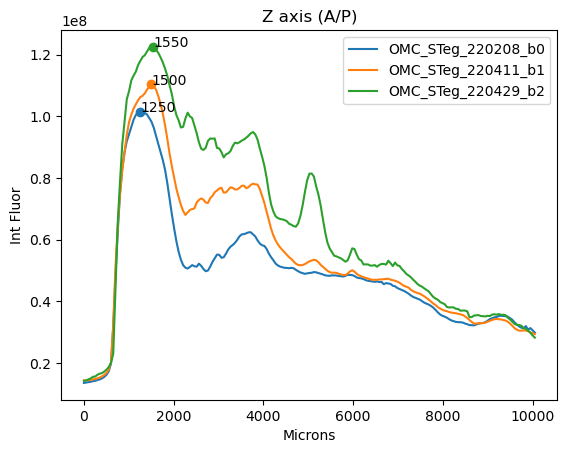

In [80]:
# visualize max fluor across different axes

# plot z axis

im_z = [im.sum(axis=1).sum(axis=1) for im in images]

for i in range(len(im_z)):
    br = im_z[i]
    plt.plot(np.linspace(0,201*50, 201), br, label=meta_sp_inj.loc[i,'brain'])
    max_F = br.max()
    maxidx_F = br.argmax()*50
    plt.scatter(maxidx_F, max_F)
    plt.annotate(str(maxidx_F), (maxidx_F, max_F))

plt.legend()
plt.title("Z axis (A/P)")
plt.xlabel("Microns")
plt.ylabel("Int Fluor")

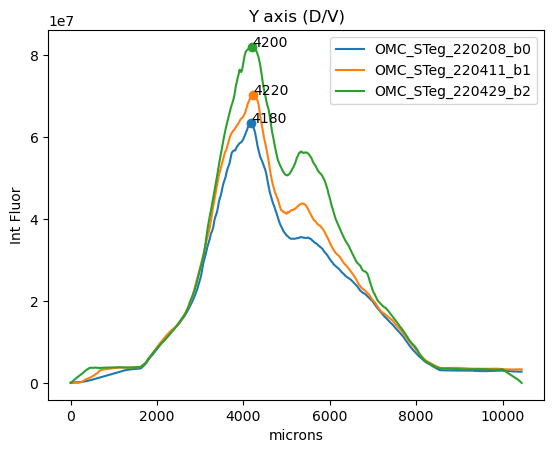

In [81]:
# plot y axis

im_ax = [im.sum(axis=0).sum(axis=1) for im in images]

for i in range(len(im_ax)):
    br = im_ax[i]
    plt.plot(np.linspace(0, br.shape[0]*20, br.shape[0]), br, label=meta_sp_inj.loc[i,'brain'])
    max_F = br.max()
    maxidx_F = br.argmax()*20
    plt.scatter(maxidx_F, max_F)
    plt.annotate(str(maxidx_F), (maxidx_F, max_F))

plt.legend()
plt.title("Y axis (D/V)")
plt.xlabel("microns")
plt.ylabel("Int Fluor")

plt.show()

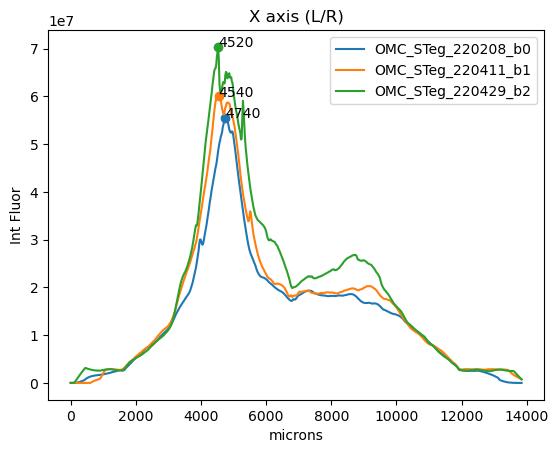

In [82]:
# plot x axis

im_ax = [im.sum(axis=0).sum(axis=0) for im in images]

for i in range(len(im_ax)):
    br = im_ax[i]
    plt.plot(np.linspace(0, br.shape[0]*20, br.shape[0]), br, label=meta_sp_inj.loc[i,'brain'])
    max_F = br.max()
    maxidx_F = br.argmax()*20
    plt.scatter(maxidx_F, max_F)
    plt.annotate(str(maxidx_F), (maxidx_F, max_F))

plt.legend()
plt.title("X axis (L/R)")
plt.xlabel("microns")
plt.ylabel("Int Fluor")

plt.show()

# Plot contours

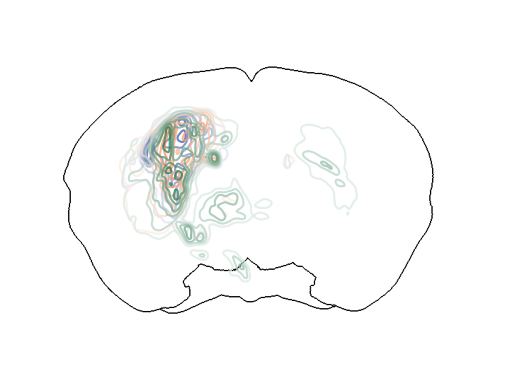

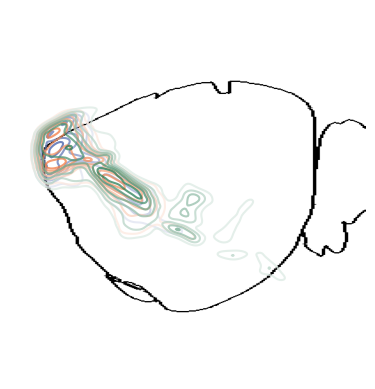

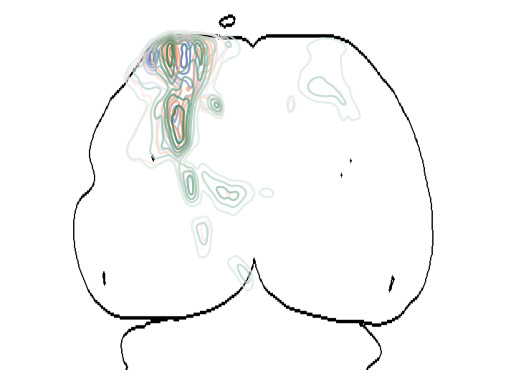

In [84]:
plot_contour(images, mask_dict=mask_dict, masks_to_plot=["grey", "CTX"], view="front")
plt.show()

plot_contour(images, mask_dict=mask_dict, masks_to_plot=["grey", "CTX"], view="side")
plt.show()

plot_contour(images, mask_dict=mask_dict, masks_to_plot=["grey", "CTX"], view="top")
plt.show()

# apply inj mask

# napari visualization

In [105]:
viewer = napari.Viewer()
colors = ["green", "cyan", "magenta"]
for i in range(len(images)):
    viewer.add_image(
        images[i],
        name=meta_sp_inj.loc[i, 'brain'],
        scale=[2.5,1,1],
         # contrast_limits=[0,1],
         blending="additive",
        colormap=colors[i]
        )
    


In [ ]:
colors = ['bop blue', 'bop orange', 'bop purple']
for i in range(len(mask_dict['inj'])):
    viewer.add_image(
        mask_dict['inj'][i],
        name='inj_'+meta_sp_inj.loc[i, 'brain'],
        scale=[2.5,1,1],
         # contrast_limits=[0,1],
         blending="additive",
        colormap=colors[i]
        )

# Apply threshold

In [95]:
im_thr = [threshold_otsu(im) for im in images]
mask_dict['inj'] = [images[i] > im_thr[i] for i in range(len(images))]


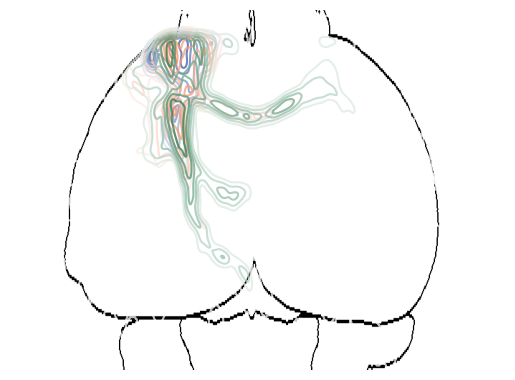

In [104]:
plot_contour(images, mask_dict, roi="inj", masks_to_plot=["grey", "BS", "CTX"], view="top")
plt.show()

In [101]:
mask_dict['inj'][0]

array([[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, Fal